# Traffy Fondue data
This file works on data downloaded from the chadchart traffy website

In [145]:
# setup pandas and read the csv file

import pandas as pd
import numpy as np
import folium

df_import = pd.read_csv('teamchadchart_dec_12_2022.csv')

print(df_import.shape)
print(df_import.columns)

(100000, 12)
Index(['ticket_id', 'type', 'organization', 'comment', 'coords', 'photo',
       'address', 'district', 'subdistrict', 'province', 'timestamp', 'state'],
      dtype='object')


In [146]:
# enabling full column display
pd.set_option('display.max_columns', None)

df_import.tail()

date = pd.Timestamp('2022-07-12 09:51:53.852474+00')
date.date().month

7

# Language support
This section will translate the types, organization, status, and city region and location names.

In [147]:
type = {
    'อื่นๆ':'Other',
    'ถนน':'Road',
    'ทางเท้า':'Sidewalk',
    'น้ำท่วม':'Flood',
    'แสงสว่าง':'Light',
    'ความปลอดภัย':'Safety',
    'ความสะอาด':'Cleanliness',
    'ท่อระบายน้ำ':'Drain',
    'สะพาน':'Bridge',
    'กีดขวาง':'Obstruction',
    'จราจร':'Traffic',  
    'สายไฟ':'Electric Wires',
    'คลอง':'Canal',
    'ต้นไม้':'Tree',
    'เสียงรบกวน':'Noise',
    'สัตว์จรจัด':'Stray animals',
    'ป้าย':'Signage',
    'ร้องเรียน':'Complaint',
    'เสนอแนะ':'Suggestion',
    'คนจรจัด':'Homeless',
    'การเดินทาง':'Journey',
    'สอบถาม':'Inquiry',
    'ห้องน้ำ':'Bathroom',
    'PM2.5':'PM2.5',
    'ป้ายจราจร':'Traffic Signs'
}

#state should be the same as status
state = {
    'ส่งเรื่องแล้ว':'Submitted',
    'กำลังดำเนินการ':'In progress',
    'เสร็จสิ้น':'finish',
    'ส่งต่อ(ใหม่)':'Forward(New)',
    'ของบประมาณ':'Ask for a budget.',
    'รอรับเรื่อง':'Waiting to get the story.',
    'ไม่เกี่ยวข้อง':'Irrelevant.'
}

statelistkey = list(state)
print(statelistkey[0])

ส่งเรื่องแล้ว


In [148]:
df_import.columns

Index(['ticket_id', 'type', 'organization', 'comment', 'coords', 'photo',
       'address', 'district', 'subdistrict', 'province', 'timestamp', 'state'],
      dtype='object')

In [149]:
# extract only the columns needed for analysis
df_traffycol = df_import[["ticket_id", "timestamp", "state", "type", "coords"]]
df_traffycol.head()

,ticket_id,timestamp,state,type,coords
0,2022-MPNV4C,2022-12-12 10:37:30.924196+00,รอรับเรื่อง,ทางเท้า,"100.61019,13.68130"
1,2022-L3WBAX,2022-12-12 10:35:01.410448+00,รอรับเรื่อง,NaN,"100.55931,13.72024"
2,2022-C3NR9L,2022-12-12 10:33:37.655019+00,รอรับเรื่อง,NaN,"100.80035,13.75550"
3,2022-A6TF69,2022-12-12 10:32:52.165067+00,รอรับเรื่อง,"ต้นไม้,ห้องน้ำ","100.66119,13.68749"
4,2022-MAMPBE,2022-12-12 10:27:23.253628+00,รอรับเรื่อง,ความปลอดภัย,"100.55660,13.73383"


In [150]:
#add a typecode column and a statuscode column and in star and count_reopen change NaN to 0
#add statuscode and typecode column
statuscode = []
for s in df_traffycol.loc[:,"state"]:
       if s in state:
              indexvalue = statelistkey.index(s)
              statuscode.append(indexvalue)
       else:
              statuscode.append(-1)


#print(statuscode)
df_traffycol["statuscode"]= statuscode

# Add empty column with translated name of type
#print(df_traffycol['type'].value_counts())
for t in type:
#       print("key: ", t, " English: ", type[t])
#       print(df_traffycol['type'].str.contains(t).value_counts())
       #add empty col with new colname
       df_traffycol[type[t]]= 0


#add a status code column assign na
df_traffycol['statuscode']= np.nan
df_traffycol.columns

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol["statuscode"]= statuscode
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[type[t]]= 0
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/1078609210.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Index(['ticket_id', 'timestamp', 'state', 'type', 'coords', 'statuscode',
       'Other', 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs'],
      dtype='object')

In [151]:
df_traffycol = df_traffycol.rename(columns={'electric wires': 'Electric Wires'})

In [152]:
df_traffycol.head()

,ticket_id,timestamp,state,type,coords,statuscode,Other,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,Electric Wires,Canal,Tree,Noise,Stray animals,Signage,Complaint,Suggestion,Homeless,Journey,Inquiry,Bathroom,PM2.5,Traffic Signs
0,2022-MPNV4C,2022-12-12 10:37:30.924196+00,รอรับเรื่อง,ทางเท้า,"100.61019,13.68130",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2022-L3WBAX,2022-12-12 10:35:01.410448+00,รอรับเรื่อง,NaN,"100.55931,13.72024",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-C3NR9L,2022-12-12 10:33:37.655019+00,รอรับเรื่อง,NaN,"100.80035,13.75550",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2022-A6TF69,2022-12-12 10:32:52.165067+00,รอรับเรื่อง,"ต้นไม้,ห้องน้ำ","100.66119,13.68749",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-MAMPBE,2022-12-12 10:27:23.253628+00,รอรับเรื่อง,ความปลอดภัย,"100.55660,13.73383",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [153]:
# code the type string into values in translated type columns
nrows = df_traffycol.shape[0]
for index in range(nrows):#df_traffycol['type'].index:
    try:
        typestring = df_traffycol['type'].iloc[index]
    except IndexError:
        print("Index error - Index: "+ str(index))
    try:
        tstring = typestring.split(",")
    except AttributeError:
        typestring = "Unknown"
        tstring = "Unknown"
    #print(tstring)
    if tstring != "Unknown":
        for t in tstring:
            if t in typestring:
                df_traffycol[type[t]].iloc[index] = 1
        #        print("TRUE type: "+type[t]+" t: "+t)
            else:
                df_traffycol[type[t]].iloc[index] = 0
        #        print("FALSE type: "+type[t]+" t: "+t)
            #df_traffycol[type[t]] = found
        #print("idex: "+str(index))
        #print(df_traffycol.iloc[index])
        if df_traffycol['state'].iloc[index] in state:
            df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])
    
    #

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2612461318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol[type[t]].iloc[index] = 1
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2612461318.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffycol['statuscode'].iloc[index]= statelistkey.index(df_traffycol['state'].iloc[index])


In [154]:
# reduce to columns for analysis
df_traffy = df_traffycol[['timestamp',  
       'Other', 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs', 'coords']]

# set the date in timestamp column
df_traffy['timestamp'] = pd.to_datetime(df_traffy['timestamp']).dt.date
df_traffy['month'] = pd.DatetimeIndex(df_traffy['timestamp']).month

typelist = ['Other', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs']

def report_type(tlist):
    newcolname = str(tlist).lower()
    df = df_traffy.groupby(['month',tlist])[tlist].sum().reset_index(name=newcolname)
    df = df[df[newcolname] != 0] #remove rows where road is 0
    df = df.drop([tlist], axis=1)
    return df

df_types = df_traffy.groupby(['month','Road'])['Road'].sum().reset_index(name='road')
#df_road = df_road['road']
print(df_types)
df_types = df_types[df_types['road'] != 0] #remove rows where road is 0
df_types = df_types.drop(['Road'], axis=1)
#df_types = report_type('Road')

for tl in typelist:
    newcol = str(tl).lower()
    df_temp = report_type(tl)
    extracted_col = df_temp[newcol]
    df_types = df_types.join(extracted_col)


df_types

/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2571276768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffy['timestamp'] = pd.to_datetime(df_traffy['timestamp']).dt.date
/var/folders/r9/s9f9f5cj77l7qzjyd8t03b1h0000gn/T/ipykernel_45790/2571276768.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffy['month'] = pd.DatetimeIndex(df_traffy['timestamp']).month


    month  Road  road
0       7     0     0
1       7     1  4639
2       8     0     0
3       8     1  5946
4       9     0     0
5       9     1  5275
6      10     0     0
7      10     1  3395
8      11     0     0
9      11     1  2509
10     12     0     0
11     12     1   875


,month,road,other,sidewalk,flood,light,safety,cleanliness,drain,bridge,obstruction,traffic,electric wires,canal,tree,noise,stray animals,signage,complaint,suggestion,homeless,journey,inquiry,bathroom,pm2.5,traffic signs
1,7,4639,NaN,1744,3173,1388,924,1263,1112,898,897,609,948,659,685,440,173,NaN,NaN,64,20,19,NaN,NaN,NaN,NaN
3,8,5946,NaN,2308,2876,1598,1326,1331,1306,1098,1150,965,890,803,784,521,190,NaN,NaN,102,35,28,NaN,NaN,NaN,NaN
5,9,5275,NaN,1774,4328,1208,1103,1139,1176,798,904,776,541,724,566,371,134,NaN,NaN,73,26,18,NaN,NaN,NaN,NaN
7,10,3395,NaN,1529,1166,928,1154,1004,742,591,861,507,378,354,381,381,220,NaN,NaN,47,58,28,NaN,NaN,NaN,NaN
9,11,2509,NaN,1668,439,1004,1380,1102,590,615,882,779,355,299,349,355,280,NaN,NaN,58,69,48,NaN,NaN,NaN,NaN
11,12,875,NaN,624,96,422,470,396,222,195,299,256,141,81,113,141,91,NaN,NaN,11,19,16,NaN,NaN,NaN,NaN


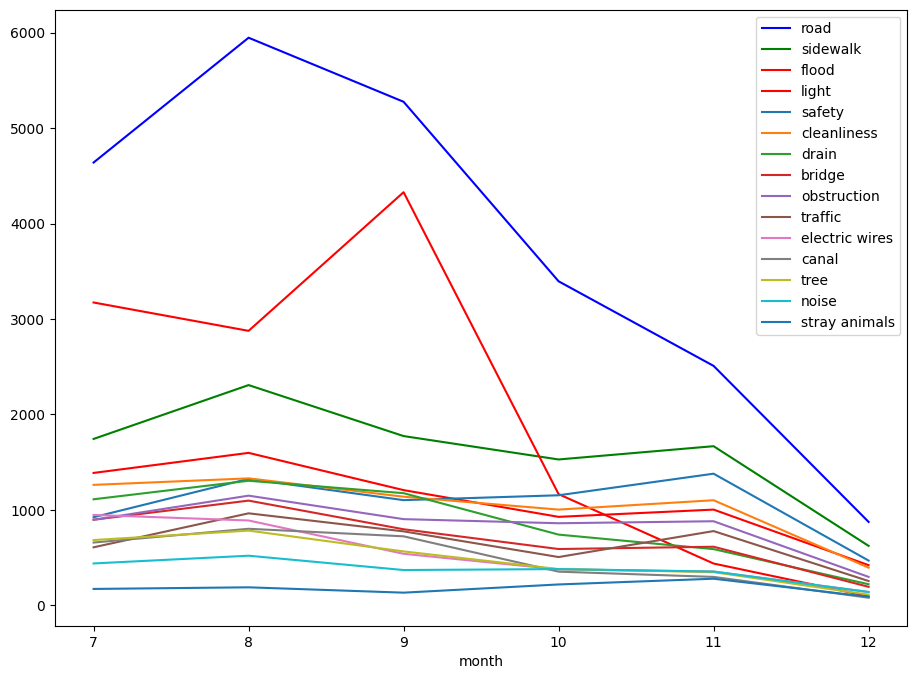

In [155]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

dims = (11, 8)
fig = plt.subplots(figsize=dims)
ax = plt.gca()

#data=df_types
df_types.plot(kind='line',x='month',y='road', color='blue',ax=ax)
df_types.plot(kind='line',x='month',y='sidewalk', color='green',ax=ax)
df_types.plot(kind='line',x='month',y='flood', color='red', ax=ax)
df_types.plot(kind='line',x='month',y='light', color='red', ax=ax)
df_types.plot(kind='line',x='month',y='safety',  ax=ax)
df_types.plot(kind='line',x='month',y='cleanliness', ax=ax)
df_types.plot(kind='line',x='month',y='drain',  ax=ax)
df_types.plot(kind='line',x='month',y='bridge',  ax=ax)
df_types.plot(kind='line',x='month',y='obstruction',  ax=ax)
df_types.plot(kind='line',x='month',y='traffic',  ax=ax)
df_types.plot(kind='line',x='month',y='electric wires',  ax=ax)
df_types.plot(kind='line',x='month',y='canal',  ax=ax)
df_types.plot(kind='line',x='month',y='tree',  ax=ax)
df_types.plot(kind='line',x='month',y='noise',  ax=ax)
df_types.plot(kind='line',x='month',y='stray animals', ax=ax)

plt.show()

In [156]:
df_traffy_corr = df_traffycol[[ 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals', 'Signage', 'Complaint', 'Suggestion',
       'Homeless', 'Journey', 'Inquiry', 'Bathroom', 'PM2.5', 'Traffic Signs']]

df_traffy_corr.corr()

,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,Electric Wires,Canal,Tree,Noise,Stray animals,Signage,Complaint,Suggestion,Homeless,Journey,Inquiry,Bathroom,PM2.5,Traffic Signs
Road,1.000000,-0.057625,-0.013737,-0.019551,0.068834,-0.087021,-0.018973,0.015649,-0.041292,0.047800,-0.064309,0.006378,-0.017087,-0.037571,-0.040382,-0.029002,-0.001792,-0.000148,-0.012749,-0.006363,-0.002224,-0.013414,-0.006629,0.000405
Sidewalk,-0.057625,1.000000,-0.084729,-0.049250,0.016623,-0.038872,-0.033358,-0.008227,0.027732,-0.041587,-0.020776,-0.020056,0.006758,-0.035744,-0.025128,0.001884,0.007134,-0.006975,0.006478,-0.005258,0.000208,-0.007368,-0.002722,-0.002398
Flood,-0.013737,-0.084729,1.000000,-0.090542,-0.067138,-0.057755,0.037665,-0.051076,-0.077077,-0.064272,-0.061736,0.050545,-0.049669,-0.053200,-0.037689,-0.037424,-0.019773,-0.007160,-0.015744,-0.010822,-0.009798,-0.004008,-0.005622,-0.005372
Light,-0.019551,-0.049250,-0.090542,1.000000,0.101192,-0.064079,-0.058192,0.041400,-0.054743,-0.043653,-0.032587,-0.012053,-0.013408,-0.037584,-0.023475,-0.009754,-0.005949,-0.011042,0.001814,0.026261,-0.004156,-0.003949,-0.004015,0.001743
Safety,0.068834,0.016623,-0.067138,0.101192,1.000000,-0.043964,0.014790,0.049133,-0.010426,-0.005810,0.043482,-0.003560,0.023055,-0.020476,-0.005991,0.004570,0.019873,0.004433,0.027189,0.013478,0.004482,0.005501,-0.001249,0.001881
Cleanliness,-0.087021,-0.038872,-0.057755,-0.064079,-0.043964,1.000000,-0.030316,-0.028791,-0.031202,-0.045905,-0.038659,0.016443,-0.015200,-0.020185,-0.003922,0.011434,0.016976,-0.007742,0.018117,-0.006047,0.003662,0.004121,0.001544,-0.003737
Drain,-0.018973,-0.033358,0.037665,-0.058192,0.014790,-0.030316,1.000000,-0.035882,-0.045719,-0.042670,-0.036086,-0.010569,-0.027111,0.001010,-0.023125,-0.022656,-0.012859,0.000551,-0.011112,-0.005809,-0.003330,0.002389,-0.003534,-0.003376
Bridge,0.015649,-0.008227,-0.051076,0.041400,0.049133,-0.028791,-0.035882,1.000000,-0.004914,0.029848,-0.010253,0.051997,-0.013346,-0.022626,-0.015215,-0.009488,-0.000570,0.005961,0.026704,0.001781,-0.000534,-0.003652,-0.003174,0.000410
Obstruction,-0.041292,0.027732,-0.077077,-0.054743,-0.010426,-0.031202,-0.045719,-0.004914,1.000000,0.030784,-0.027284,-0.026669,-0.008156,-0.021335,-0.020945,0.013095,0.013616,-0.002876,-0.002252,-0.002133,0.007472,-0.006067,-0.003477,0.003015
Traffic,0.047800,-0.041587,-0.064272,-0.043653,-0.005810,-0.045905,-0.042670,0.029848,0.030784,1.000000,-0.031946,-0.020160,-0.016395,-0.026024,-0.018115,0.003129,0.014457,0.012330,-0.009599,0.005080,0.007997,-0.003371,-0.003052,0.000652


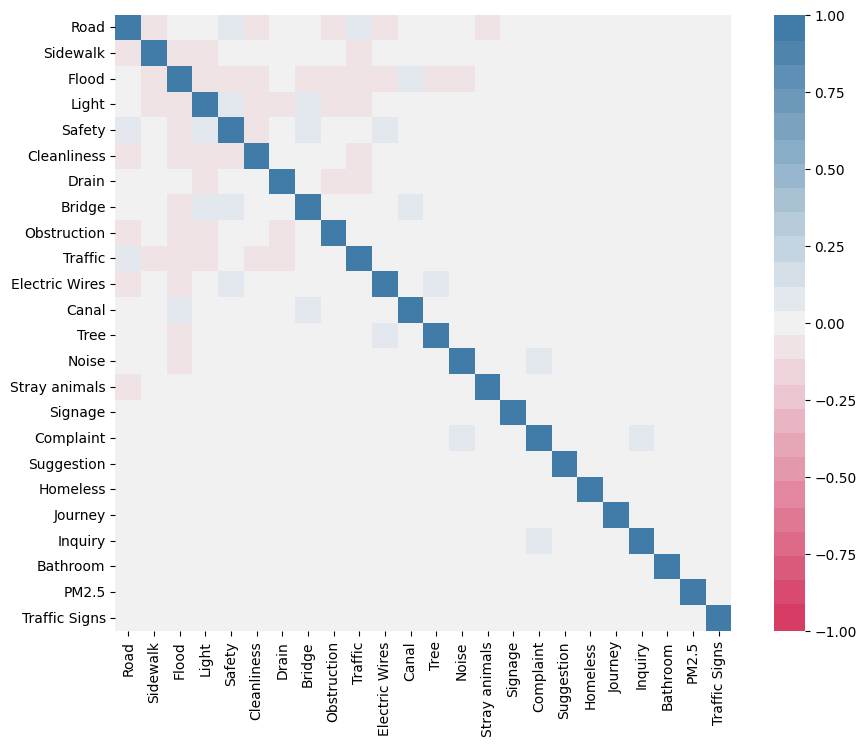

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

dims = (11, 8)
fig = plt.subplots(figsize=dims)
correlation_full_health = df_traffy_corr.corr().round(3)

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(2, 600, n=25),
square=True, annot=False
)

plt.show()

In [158]:
df_complaints = df_traffycol[[ 'Road', 'Sidewalk', 'Flood', 'Light', 'Safety', 'Cleanliness',
       'Drain', 'Bridge', 'Obstruction', 'Traffic', 'Electric Wires', 'Canal',
       'Tree', 'Noise', 'Stray animals']]

df_complaints.corr()

,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,Electric Wires,Canal,Tree,Noise,Stray animals
Road,1.000000,-0.057625,-0.013737,-0.019551,0.068834,-0.087021,-0.018973,0.015649,-0.041292,0.047800,-0.064309,0.006378,-0.017087,-0.037571,-0.040382
Sidewalk,-0.057625,1.000000,-0.084729,-0.049250,0.016623,-0.038872,-0.033358,-0.008227,0.027732,-0.041587,-0.020776,-0.020056,0.006758,-0.035744,-0.025128
Flood,-0.013737,-0.084729,1.000000,-0.090542,-0.067138,-0.057755,0.037665,-0.051076,-0.077077,-0.064272,-0.061736,0.050545,-0.049669,-0.053200,-0.037689
Light,-0.019551,-0.049250,-0.090542,1.000000,0.101192,-0.064079,-0.058192,0.041400,-0.054743,-0.043653,-0.032587,-0.012053,-0.013408,-0.037584,-0.023475
Safety,0.068834,0.016623,-0.067138,0.101192,1.000000,-0.043964,0.014790,0.049133,-0.010426,-0.005810,0.043482,-0.003560,0.023055,-0.020476,-0.005991
Cleanliness,-0.087021,-0.038872,-0.057755,-0.064079,-0.043964,1.000000,-0.030316,-0.028791,-0.031202,-0.045905,-0.038659,0.016443,-0.015200,-0.020185,-0.003922
Drain,-0.018973,-0.033358,0.037665,-0.058192,0.014790,-0.030316,1.000000,-0.035882,-0.045719,-0.042670,-0.036086,-0.010569,-0.027111,0.001010,-0.023125
Bridge,0.015649,-0.008227,-0.051076,0.041400,0.049133,-0.028791,-0.035882,1.000000,-0.004914,0.029848,-0.010253,0.051997,-0.013346,-0.022626,-0.015215
Obstruction,-0.041292,0.027732,-0.077077,-0.054743,-0.010426,-0.031202,-0.045719,-0.004914,1.000000,0.030784,-0.027284,-0.026669,-0.008156,-0.021335,-0.020945
Traffic,0.047800,-0.041587,-0.064272,-0.043653,-0.005810,-0.045905,-0.042670,0.029848,0.030784,1.000000,-0.031946,-0.020160,-0.016395,-0.026024,-0.018115


In [159]:
df_complaints.describe()

,Road,Sidewalk,Flood,Light,Safety,Cleanliness,Drain,Bridge,Obstruction,Traffic,Electric Wires,Canal,Tree,Noise,Stray animals
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.226390,0.096470,0.120780,0.065480,0.063570,0.062350,0.051480,0.041950,0.049930,0.038920,0.032530,0.029200,0.028780,0.022090,0.010880
std,0.418496,0.295236,0.325873,0.247372,0.243987,0.241791,0.220976,0.200476,0.217801,0.193405,0.177404,0.168368,0.167188,0.146977,0.103739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


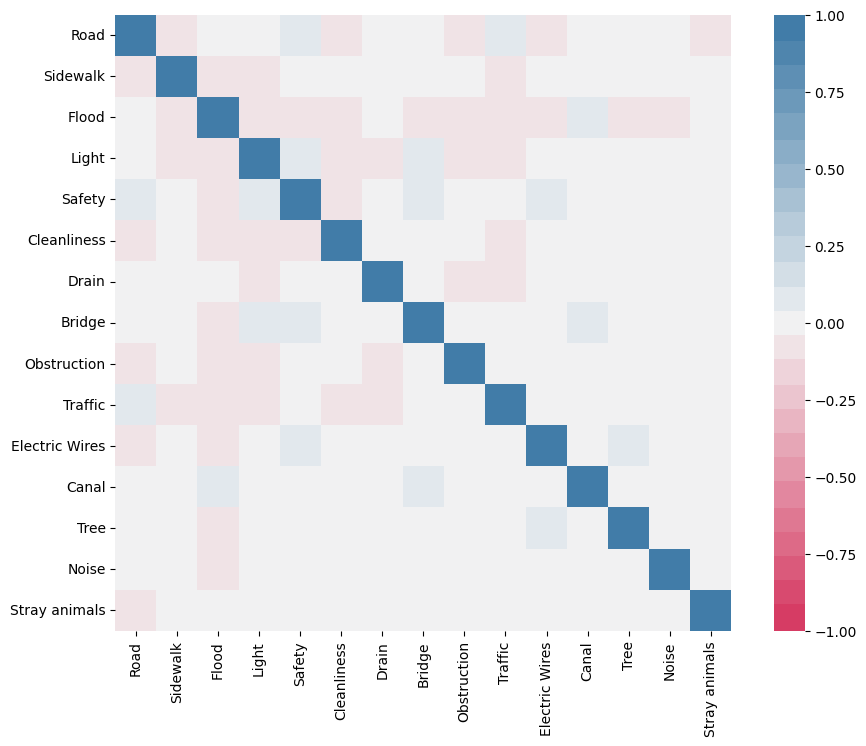

In [160]:
ims = (11, 8)
fig = plt.subplots(figsize=dims)
correlation_full_health = df_complaints.corr().round(3)

axis_corr = sns.heatmap(
correlation_full_health,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(2, 600, n=25),
square=True, annot=False
)

plt.show()

<AxesSubplot: >

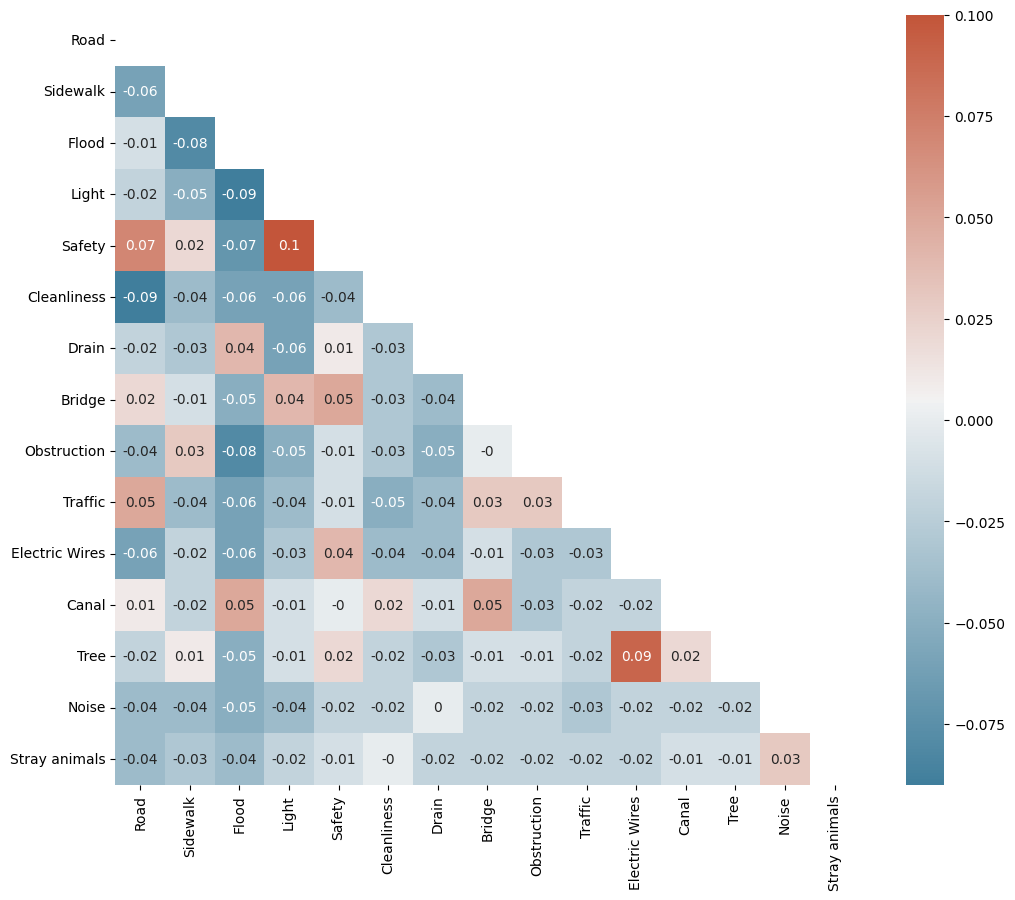

In [161]:
# Correlation between different variables
#
corr = df_complaints.corr().round(2)
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)